### 生成三组不同均值和方差的高斯分布散点

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

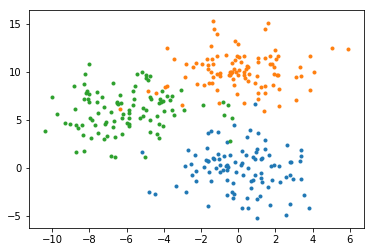

(300, 2)


In [2]:
X = np.zeros((2, 300))
for i in range(100):
    X[0, i] = random.gauss(0, 2)
    X[1, i] = random.gauss(0, 2)
for i in range(100, 200):
    X[0, i] = random.gauss(0, 2)
    X[1, i] = random.gauss(10, 2)
for i in range(200, 300):
    X[0, i] = random.gauss(-6, 2)
    X[1, i] = random.gauss(6, 2)
plt.scatter(X[0, 0:100], X[1, 0:100], marker=".")
plt.scatter(X[0, 100:200], X[1, 100:200], marker=".")
plt.scatter(X[0, 200:300], X[1, 200:300], marker=".")
plt.show()
X = X.T
print(X.shape)

### 使用K-means算法聚类

In [6]:
def calDis(one, two):
    assert len(one) == len(two)
    dis = 0.
    for i in range(len(one)):
        dis = dis + (one[i] - two[i])**2
    return dis
    
def kmeans(generation, x):
    c1_center = x[random.randint(0, x.shape[0])]
    c2_center = x[random.randint(0, x.shape[0])]
    c3_center = x[random.randint(0, x.shape[0])]
    
    for i in range(generation):
        c1 = []
        c2 = []
        c3 = []

        for i in range(x.shape[0]):
            current = x[i]
            c1_dis = calDis(c1_center, current)
            c2_dis = calDis(c2_center, current)
            c3_dis = calDis(c3_center, current)
            if (c1_dis <= c2_dis) & (c1_dis <= c3_dis):
                c1.append(current)
            elif (c2_dis <= c1_dis) & (c2_dis <= c3_dis):
                c2.append(current)
            else:
                c3.append(current)

        sumx = 0.0
        sumy = 0.0
        if len(c1) != 0:
            for i in range(len(c1)):
                sumx = sumx + c1[i][0]
                sumy = sumy + c1[i][1]
            c1_center = [sumx / len(c1), sumy / len(c1)]
        
        sumx = 0.0
        sumy = 0.0
        if len(c2) != 0:
            for i in range(len(c2)):
                sumx = sumx + c2[i][0]
                sumy = sumy + c2[i][1]
            c2_center = [sumx / len(c2), sumy / len(c2)]

        sumx = 0.0
        sumy = 0.0
        if len(c3) != 0:
            for i in range(len(c3)):
                sumx = sumx + c3[i][0]
                sumy = sumy + c3[i][1]
            c3_center = [sumx / len(c3), sumy / len(c3)]
        
    return c1_center, c2_center, c3_center

In [7]:
def draw(c1_center, c2_center, c3_center, x):
    c1 = []
    c2 = []
    c3 = []

    for i in range(x.shape[0]):
        current = x[i]
        c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
        c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
        c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
        if (c1_dis <= c2_dis) & (c1_dis <= c3_dis):
            c1.append(current)
        elif (c2_dis <= c1_dis) & (c2_dis <= c3_dis):
            c2.append(current)
        else:
            c3.append(current)

    for i in range(len(c1)):
        plt.scatter(c1[i][0], c1[i][1], marker=".", color="r")
    for i in range(len(c2)):
        plt.scatter(c2[i][0], c2[i][1], marker=".", color="g")
    for i in range(len(c3)):
        plt.scatter(c3[i][0], c3[i][1], marker=".", color="b")
    
    waixin = getWaixin(c1_center, c2_center, c3_center)
    k1 = [(c1_center[0] + c2_center[0]) / 2, (c1_center[1] + c2_center[1]) / 2]
    k2 = [(c1_center[0] + c3_center[0]) / 2, (c1_center[1] + c3_center[1]) / 2]
    k3 = [(c2_center[0] + c3_center[0]) / 2, (c2_center[1] + c3_center[1]) / 2]
    
    plt.scatter(c1_center[0], c1_center[1], marker="^", color="k")
    plt.scatter(c2_center[0], c2_center[1], marker="v", color="k")
    plt.scatter(c3_center[0], c3_center[1], marker="<", color="k")
    drawYanchang(waixin, k1)
    drawYanchang(waixin, k2)
    drawYanchang(waixin, k3)
    plt.show()
    
def drawYanchang(waixin, one):
    k = (one[1] - waixin[1]) / (one[0] - waixin[0])
    b = one[1] - k * one[0]
    if waixin[0] < one[0]:
        plt.plot([waixin[0], waixin[0] + 10], [waixin[1], k * (waixin[0] + 10) + b], color='k')
    else:
        plt.plot([waixin[0], waixin[0] - 10], [waixin[1], k * (waixin[0] - 10) + b], color='k')
        
    
def getWaixin(c1_center, c2_center, c3_center):
    a1 = c2_center[0] - c1_center[0]
    b1 = c2_center[1] - c1_center[1]
    c1 = (a1*a1 + b1*b1)/2; 
    a2 = c3_center[0] - c1_center[0]
    b2 = c3_center[1] - c1_center[1]
    c2 = (a2*a2 + b2*b2)/2; 
    d = a1*b2 - a2*b1; 
    return [c1_center[0] + (c1*b2 - c2*b1)/d, c1_center[1] + (a1*c2 -a2*c1)/d]

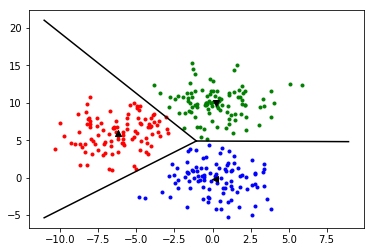

In [8]:
c1_center, c2_center, c3_center = kmeans(5000, X)
draw(c1_center, c2_center, c3_center, X)

### 使用GMM的EM算法

In [6]:
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

In [7]:
def update_W(X, Mu, Var, Pi):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W

def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi

def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))

def plot_clusters(X, Mu, Var):
    colors = ['r', 'g', 'b']
    n_clusters = len(Mu)
    XT = X.T
    plt.scatter(XT[0, 0:100], XT[1, 0:100], marker=".", color="r")
    plt.scatter(XT[0, 100:200], XT[1, 100:200], marker=".", color="g")
    plt.scatter(XT[0, 200:300], XT[1, 200:300], marker=".", color="b")
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)        
    plt.show()
    
def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu

def update_Var(X, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Var

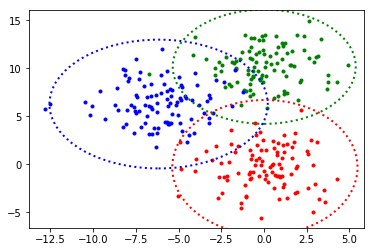

In [8]:
true_Mu = [[0., 0.], [0., 10.], [-6., 6.]]
true_Var = [[2, 2], [2, 2], [2, 2]]
n_clusters = 3
n_points = len(X)
Mu = [[0, 1], [0, 5], [-3, 5]]
Var = [[1, 1], [1, 1], [1, 1]]
Pi = [1 / n_clusters] * 3
W = np.ones((n_points, n_clusters)) / n_clusters 
Pi = W.sum(axis=0) / W.sum()
# 迭代
for i in range(100):
    logLH(X, Pi, Mu, Var)
    W = update_W(X, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(X, W)
    Var = update_Var(X, Mu, W)
plot_clusters(X, Mu, Var)